<a href="https://colab.research.google.com/github/imsaurav/EIP4/blob/master/1st_DNN_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


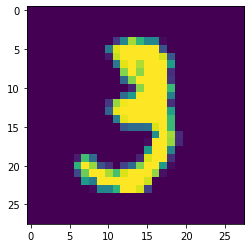

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:128]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [9]:
Y_train[:128]


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

# model.add(Convolution2D(256, 3, 3, activation='relu'))

# 
# model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

# model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Convolution2D(10, 3,3, activation='relu'))

# model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  app.launch_new_instance()


In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 10)        5770      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25, verbose=1)

Epoch 1/25
   64/60000 [..............................] - ETA: 2:35 - loss: 0.0053 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 153s 3ms/step - loss: 0.0085 - acc: 0.9976
Epoch 2/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0075 - acc: 0.9978
Epoch 3/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0061 - acc: 0.9984
Epoch 4/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0053 - acc: 0.9983
Epoch 5/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0060 - acc: 0.9984
Epoch 6/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0057 - acc: 0.9984
Epoch 7/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0056 - acc: 0.9983
Epoch 8/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0064 - acc: 0.9981
Epoch 9/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0037 - acc: 0.9990
Epoch 10/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0070 - acc: 0.9982


In [35]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 7s 720us/step


In [36]:
print(score)

[0.08940376769428127, 0.991]


In [0]:
y_pred = model.predict(X_test)

In [38]:
print(y_pred[:9])
print(y_test[:9])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.2076260e-38 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.6469525e-33 1.0000000e+00 2.3947364e-28 0.0000000e+00 3.4350817e-20
  8.2453888e-29 9.1016718e-30 2.5076544e-19 1.5126649e-28 7.1543642e-33]
 [1.0000000e+00 0.0000000e+00 2.4661553e-38 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.5442996e-30 0.0000000e+00 0.0000000e+00 2.7908552e-38]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8599697e-21]
 [1.9772404e-37 1.0000000e+00 1.8319792e-29 0.0000000e+00 3.9206955e-21
  2.2882906e-37 6.3705724e-36 9.2002813e-16 1.4940370e-30 2.0394513e-38]
 [0.0000000e+00 1.9801475e-36 3.0327116e-34 0.0000000e+00 1.0000000e+00
  2.1967735e-18 0.0000000e+00 2.2138651e-28 9.5195052e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
# import numpy as np
# from matplotlib import pyplot as plt
# from keras import backend as K
# %matplotlib inline
# # util function to convert a tensor into a valid image
# def deprocess_image(x):
#     # normalize tensor: center on 0., ensure std is 0.1
#     x -= x.mean()
#     x /= (x.std() + 1e-5)
#     x *= 0.1

#     # clip to [0, 1]
#     x += 0.5
#     x = np.clip(x, 0, 1)

#     # convert to RGB array
#     x *= 255
#     #x = x.transpose((1, 2, 0))
#     x = np.clip(x, 0, 255).astype('uint8')
#     return x

# def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
#                       layer_name = 'conv2d_14'):
#     layer_output = layer_dict[layer_name].output
#     img_ascs = list()
#     for filter_index in range(layer_output.shape[3]):
#         # build a loss function that maximizes the activation
#         # of the nth filter of the layer considered
#         loss = K.mean(layer_output[:, :, :, filter_index])

#         # compute the gradient of the input picture wrt this loss
#         grads = K.gradients(loss, model.input)[0]

#         # normalization trick: we normalize the gradient
#         grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

#         # this function returns the loss and grads given the input picture
#         iterate = K.function([model.input], [loss, grads])

#         # step size for gradient ascent
#         step = 5.

#         img_asc = np.array(img)
#         # run gradient ascent for 20 steps
#         for i in range(20):
#             loss_value, grads_value = iterate([img_asc])
#             img_asc += grads_value * step

#         img_asc = img_asc[0]
#         img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
#     if layer_output.shape[3] >= 35:
#         plot_x, plot_y = 6, 6
#     elif layer_output.shape[3] >= 23:
#         plot_x, plot_y = 4, 6
#     elif layer_output.shape[3] >= 11:
#         plot_x, plot_y = 2, 6
#     else:
#         plot_x, plot_y = 1, 2
#     fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
#     ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
#     ax[0, 0].set_title('Input image')
#     fig.suptitle('Input image and %s filters' % (layer_name,))
#     fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
#     for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
#         if x == 0 and y == 0:
#             continue
#         ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
#         ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

# vis_img_in_filter()